<a href="https://colab.research.google.com/github/abhijeetsinghims/BusinessCases/blob/main/Aerofit_Business_Case_Submission_Abhijeet_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data_path = "aerofit_treadmill.csv"
df = pd.read_csv(data_path)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe(include = "all")


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [9]:
print("\nColumns with missing values:")
for column in df.columns:
    if df[column].isnull().any():
        print(column)


Columns with missing values:


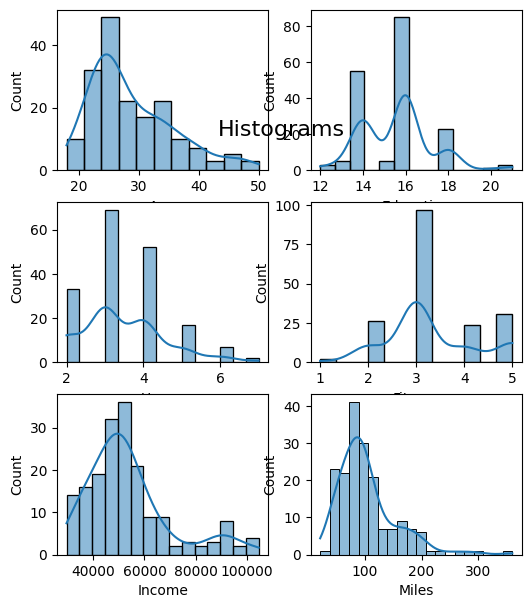

In [18]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (6, 5))
fig.subplots_adjust(top = 1.2)
fig.suptitle("Histograms", fontsize = 16)

# Plot histograms with KDE
sns.histplot(data=df, x="Age", kde=True, ax=axis[0, 0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0, 1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1, 0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1, 1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2, 0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2, 1])

# Show the plots
plt.show()

#Outlier Detection using Boxplots

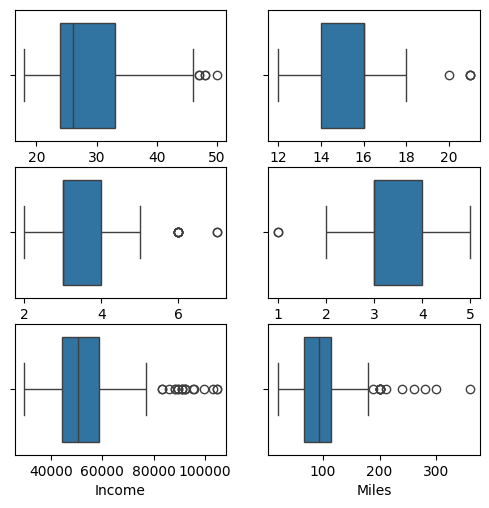

In [19]:
# Create subplots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 5))

# Adjust spacing between subplots
fig.subplots_adjust(top=1.0)

# Plot boxplots
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0, 0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0, 1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1, 0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1, 1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2, 0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2, 1])

# Show the plots
plt.show()

##Observations
Even from the boxplots it is quite clear that:


*   **Age, Education** and **usage ** are having very few outliers
*   While **Income ** and **Miles** are having more outliers



##Understanding the distribution of the data for the qualitative attributes


*   Product
*   Gender
* Maritial Status





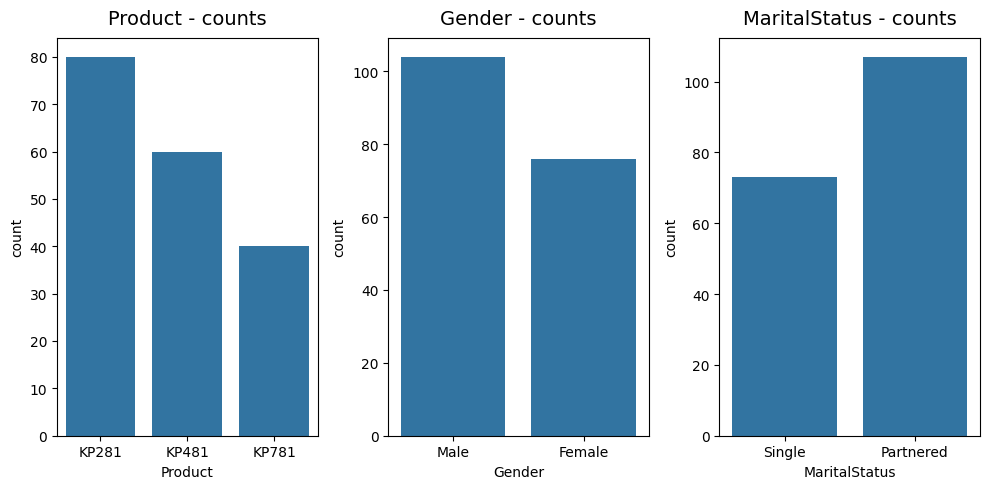

In [28]:
# Create subplots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))

# Adjust spacing between subplots
fig.subplots_adjust(top=1.0)

sns.countplot(data = df, x = "Product", ax = axs[0])
sns.countplot(data = df, x = "Gender", ax = axs[1])
sns.countplot(data = df, x = "MaritalStatus", ax = axs[2])

axs[0].set_title("Product - counts", pad = 10, fontsize = 14)
axs[1].set_title("Gender - counts", pad = 10, fontsize = 14)
axs[2].set_title("MaritalStatus - counts", pad = 10, fontsize = 14)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


##Observations
* KP281 is the most frequent product
* There are more Males in the data than Females
* More **Partnered** persons are there in the data

## To be precise - normalized count for each variable is shown below

In [34]:
df1 = df[["Product", "Gender", "MaritalStatus"]].melt()
df1.groupby(["variable", "value"])[["value"]].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

## Observations
* Product
  * 44.44% of the customers have purchased **KP281** product.
  * 33.33% of the customers have purchased **KP481** product.
  * 22.22% of the customers have purchased **KP781** product.

* Gender
  * 57.78% of the customers are **Male.**

* MaritialStatus
  * 59.44% of the customers are **Partnered.**

## Bivariate Analysis:

Checking if features - Gender or MaritialStatus ave any effect on the product purchased.

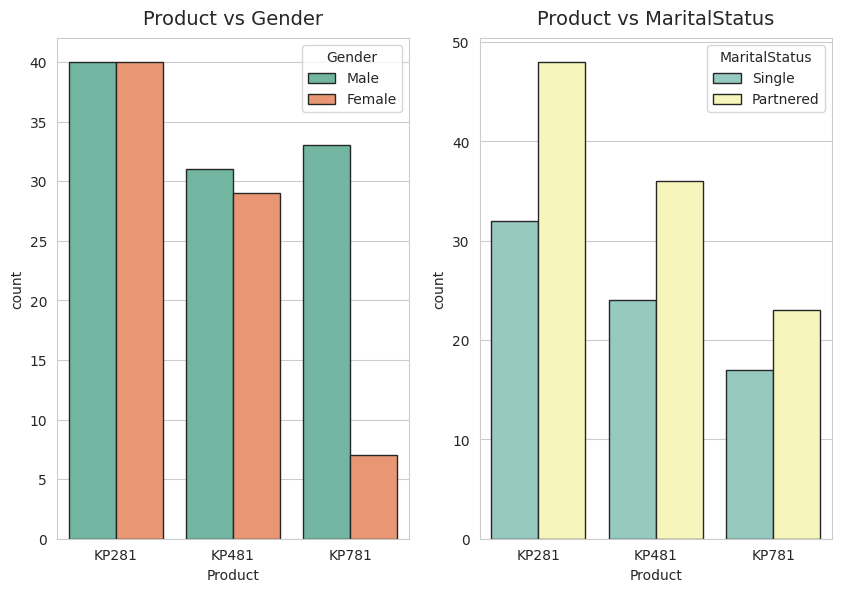

In [35]:
# Set the plotting style
sns.set_style(style='whitegrid')

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))

# Plot countplots
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])

# Set titles for subplots
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)

# Show the plots
plt.show()

## Observations
* Product vs Gender
  * Equal number of males and females have purchased KP281 product and Almost same for the product KP481
  * Most of the Male customers have purchased the KP781 product.

* Product vs MaritalStatus
  * Customer who is Partnered, is more likely to purchase the product.

# Chekcing if following features have any effect on the product purchased


1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles




<ipython-input-36-7e70a13b0f34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i, j], palette='Set3')
<ipython-input-36-7e70a13b0f34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i, j], palette='Set3')
<ipython-input-36-7e70a13b0f34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i, j], palette='Set3')
<ipython-input-36-7e70a13b0f34>:20: FutureWarning: 

Passing `palette` without assigning `hue` is

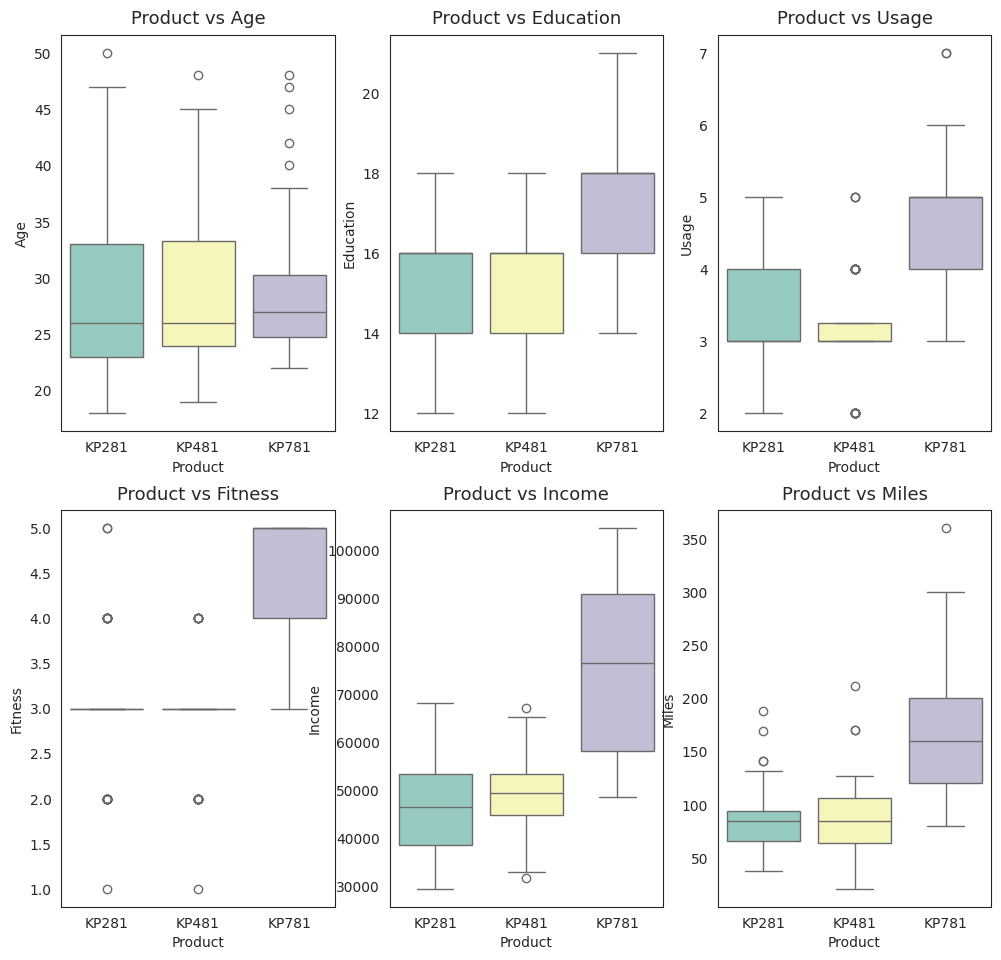

In [36]:
# Create a list of attributes
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Set the plotting style
sns.set_style("white")

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Adjust spacing between subplots
fig.subplots_adjust(top=1.2)

# Initialize a counter
count = 0

# Create nested loops to iterate through subplots
for i in range(2):
    for j in range(3):
        # Plot boxplots
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i, j], palette='Set3')

        # Set titles for subplots
        axs[i, j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)

        # Increment the counter
        count += 1

## Observations
* Females planning to use the treadmill 3-4 times a week, are more likely to buy KP481 product.


#Computing Marginal & Conditional Probabilities:
  * Marginal Probability
  


In [37]:
df['Product'].value_counts(normalize = True)


,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


## Conditinal Probabilities

**Probability of each product given gender**


In [38]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender not in ["Female", "Male"]:
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum() / len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum() / len(df):.2f}\n")

    print(f"P(KP781|gender): {p_781:.2f}")
    print(f"P(KP481|gender): {p_481:.2f}")
    print(f"P(KP281|gender): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781|gender): 0.32
P(KP481|gender): 0.30
P(KP281|gender): 0.38

P(KP781|gender): 0.09
P(KP481|gender): 0.38
P(KP281|gender): 0.53

